In [196]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_path = './news-portal-user-interactions-by-globocom/'

In [3]:
articles_metadata = pd.read_csv(data_path + 'articles_metadata.csv')  
articles_metadata

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


In [4]:
articles_embeddings = pd.read_pickle(data_path + 'articles_embeddings.pickle')

In [5]:
articles_embeddings

array([[-0.16118301, -0.95723313, -0.13794445, ..., -0.231686  ,
         0.5974159 ,  0.40962312],
       [-0.52321565, -0.974058  ,  0.73860806, ...,  0.18282819,
         0.39708954, -0.83436364],
       [-0.61961854, -0.9729604 , -0.20736018, ..., -0.44758022,
         0.8059317 , -0.28528407],
       ...,
       [-0.25139043, -0.9762427 ,  0.58609664, ..., -0.14372464,
         0.06809307, -0.7050104 ],
       [ 0.22434181, -0.92328775, -0.38174152, ...,  0.6871319 ,
        -0.5315117 ,  0.01072566],
       [-0.25713393, -0.9946313 ,  0.9837918 , ...,  0.98387307,
        -0.8381829 , -0.1792827 ]], dtype=float32)

In [6]:
articles_embeddings.shape

(364047, 250)

In [7]:
clicks_hour_000 = pd.read_csv(data_path + 'clicks/clicks_hour_000.csv')  

In [8]:
clicks_hour_000

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,705,1506828968165442,1506828968000,2,119592,1506830912301,4,1,17,1,21,2
1879,705,1506828968165442,1506828968000,2,284847,1506830942301,4,1,17,1,21,2
1880,706,1506828979881443,1506828979000,3,108854,1506829027334,4,3,2,1,25,1
1881,706,1506828979881443,1506828979000,3,96663,1506829095732,4,3,2,1,25,1


In [9]:
# user_id, session_id, session_size, click_article_id



In [10]:
file_click = data_path + 'clicks.csv'


In [11]:
def create_click_file():

    clicks_path = []
    clicks_dir = data_path + "clicks"

    clicks_path = clicks_path + sorted(
            [
                os.path.join(clicks_dir, fname)
                for fname in os.listdir(clicks_dir)
                if fname.endswith(".csv")
            ]
        )

    _li = []

    for filename in clicks_path:
        df = pd.read_csv(filename, index_col=None, header=0)
        _li.append(df)

    clicks = pd.concat(_li, axis=0, ignore_index=True)
    clicks.to_csv(file_click)

In [12]:
if not os.path.exists(file_click):
    create_click_file()
    

In [13]:
clicks= pd.read_csv(file_click)


In [14]:
clicks

,Unnamed: 0,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,2988176,10051,1508211372158328,1508211372000,2,84911,1508211557302,4,3,2,1,25,1
2988177,2988177,322896,1508211376302329,1508211376000,2,30760,1508211672520,4,1,17,1,25,2
2988178,2988178,322896,1508211376302329,1508211376000,2,157507,1508211702520,4,1,17,1,25,2
2988179,2988179,123718,1508211379189330,1508211379000,2,234481,1508211513583,4,3,2,1,25,2


In [15]:

def table_valeurs_manquantes(df):
    valeurs_manquantes = ((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)  
    return pd.DataFrame(valeurs_manquantes,columns=['% de valeurs manquantes'])
    

In [16]:
table_valeurs_manquantes(articles_metadata)

,% de valeurs manquantes
article_id,0.0
category_id,0.0
created_at_ts,0.0
publisher_id,0.0
words_count,0.0


In [17]:
pd.DataFrame(articles_embeddings).isna().sum().value_counts()


0    250
dtype: int64

In [18]:
table_valeurs_manquantes(clicks)

,% de valeurs manquantes
Unnamed: 0,0.0
user_id,0.0
session_id,0.0
session_start,0.0
session_size,0.0
click_article_id,0.0
click_timestamp,0.0
click_environment,0.0
click_deviceGroup,0.0
click_os,0.0


## Analyse des clicks

#### Clicks par session utilisateur


In [261]:
clicks['session_size'].value_counts()

2     1260372
3      670185
4      374240
5      220105
6      135762
       ...   
62         62
60         60
58         58
56         56
44         44
Name: session_size, Length: 72, dtype: int64

In [262]:
max_clicks = clicks['session_size'].max()
min_clicks = clicks['session_size'].min()
print(f"Nombre de clicks par session :\n  max : {max_clicks}\n  min : {min_clicks}")


Nombre de clicks par session :
  max : 124
  min : 2


<AxesSubplot:>

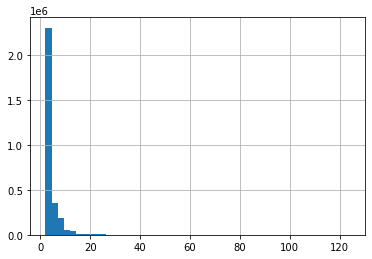

In [263]:
clicks.session_size.hist(bins=50)


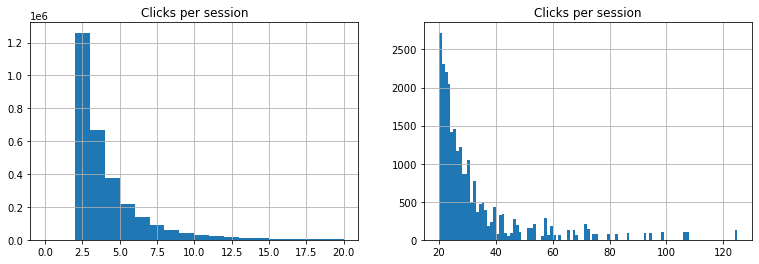

In [268]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
clicks.session_size.hist(bins=20, range=(0,20))
plt.title('Clicks per session');
plt.subplot(1,3,2)
clicks.session_size.hist(bins=105, range=(20,125))
plt.title('Clicks per session');
# plt.subplot(1,3,3)
# df_clicks_user.clicks_user.hist(bins=100,range=(200,1300))
# plt.title('Clicks per user');
plt.show()

#### Clicks par utilisateur


In [220]:
df_clicks_user = clicks.groupby(['user_id']).agg({
    'session_id': lambda x: len(x)
}).reset_index()
df_clicks_user = df_clicks_user.rename(columns={
    'session_id':'clicks_user'
})

In [221]:
df_clicks_user['clicks_user'].value_counts()

2      101428
4       38432
3       22660
6       20370
5       18070
        ...  
303         1
439         1
366         1
296         1
212         1
Name: clicks_user, Length: 302, dtype: int64

In [246]:
max_clicks = df_clicks_user['clicks_user'].max()
min_clicks = df_clicks_user['clicks_user'].min()
print(f"Nombre de clicks par utilisateur :\n  max : {max_clicks}\n  min : {min_clicks}")


Nombre de clicks par utilisateur :
  max : 1232
  min : 2


<AxesSubplot:>

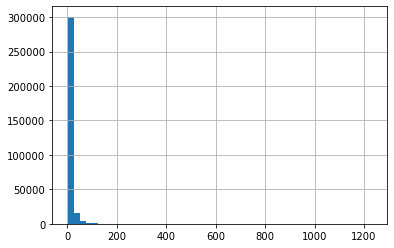

In [260]:
df_clicks_user.clicks_user.hist(bins=50)


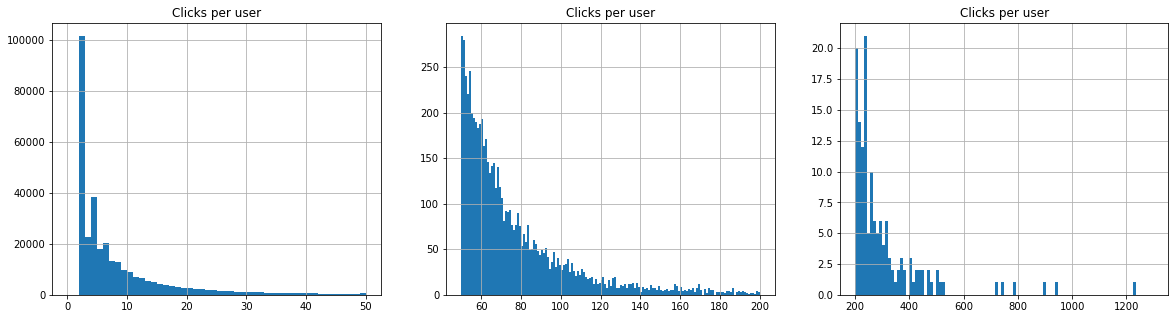

In [270]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df_clicks_user.clicks_user.hist(bins=50,range=(0,50))
plt.title('Clicks per user');
plt.subplot(1,3,2)
df_clicks_user.clicks_user.hist(bins=150,range=(50,200))
plt.title('Clicks per user');
plt.subplot(1,3,3)
df_clicks_user.clicks_user.hist(bins=100,range=(200,1300))
plt.title('Clicks per user');
plt.show()


#### Clicks par utilisateur et articles


In [227]:
df_clicks_user_article = clicks.copy()

df_clicks_user_article = df_clicks_user_article.groupby(['user_id','click_article_id']).agg({
    'session_size': lambda x: len(x)
}).reset_index()

df_clicks_user_article

,user_id,click_article_id,session_size
0,0,68866,1
1,0,87205,1
2,0,87224,1
3,0,96755,1
4,0,157541,1
...,...,...,...
2950705,322894,168401,1
2950706,322895,63746,1
2950707,322895,289197,1
2950708,322896,30760,1


In [228]:

df_clicks_user_article['session_size'].value_counts()

1     2916835
2       31459
3        1869
4         343
5          95
6          42
7          22
8          14
9           7
10          7
13          6
12          3
33          3
16          2
17          1
30          1
31          1
Name: session_size, dtype: int64

In [275]:
max_clicks = df_clicks_user_article['session_size'].max()
min_clicks = df_clicks_user_article['session_size'].min()
print(f"Nombre de clicks par utilisateur :\n  max : {max_clicks}\n  min : {min_clicks}")


Nombre de clicks par utilisateur :
  max : 33
  min : 1


<AxesSubplot:>

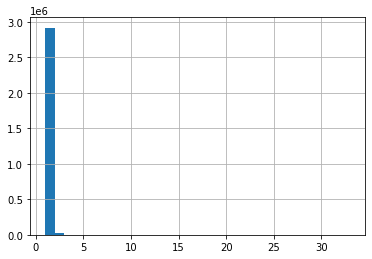

In [276]:
df_clicks_user_article.session_size.hist(bins=33)


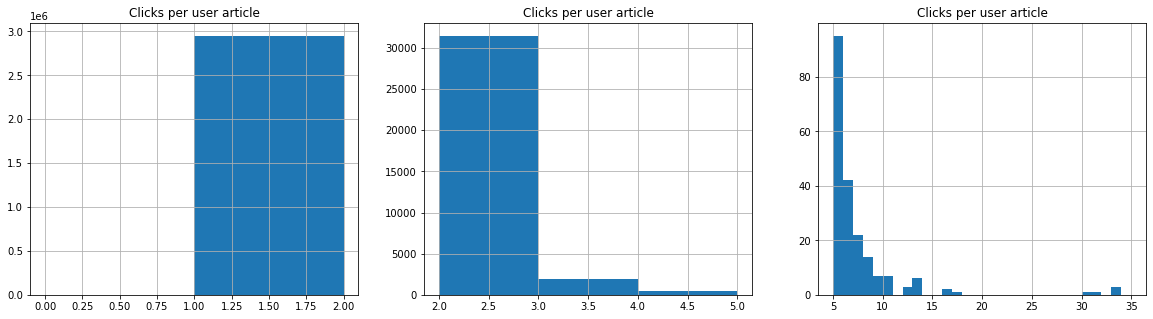

In [292]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df_clicks_user_article.session_size.hist(bins=2,range=(0,2))
plt.title('Clicks per user article');
plt.subplot(1,3,2)
df_clicks_user_article.session_size.hist(bins=3,range=(2,5))
plt.title('Clicks per user article');
plt.subplot(1,3,3)
df_clicks_user_article.session_size.hist(bins=30,range=(5,35))
plt.title('Clicks per user article');
plt.show()

#### Clicks par session et articles


In [273]:
df_clicks_user_article_session = clicks.copy()

df_clicks_user_article_session = df_clicks_user_article_session.groupby(['user_id','session_id','click_article_id']).agg({
    'session_size': lambda x: len(x)
}).reset_index()

df_clicks_user_article_session

,user_id,session_id,click_article_id,session_size
0,0,1506825423271737,68866,1
1,0,1506825423271737,157541,1
2,0,1507340000920377,96755,1
3,0,1507340000920377,313996,1
4,0,1507385847186982,160158,1
...,...,...,...,...
2988176,322894,1508211292336313,168401,1
2988177,322895,1508211314125317,63746,1
2988178,322895,1508211314125317,289197,1
2988179,322896,1508211376302329,30760,1


In [274]:
df_clicks_user_article_session['session_size'].value_counts()

1    2988181
Name: session_size, dtype: int64

# Content based recommender

In [19]:
from operator import itemgetter

# get embedding for one article
def get_embedding_from_article(article_id):
    return articles_embeddings[article_id]

# get last clicked article or random clicked article for one user
def get_article_from_user(user_id, method = 'last'):
    
    article_id = ''
    clicks_user = clicks[clicks['user_id']==user_id].copy()
    
    if method == 'last':
        clicks_user['click_timestamp'] = clicks_user['click_timestamp'].apply(str)
        clicks_user['click_timestamp'] = clicks_user.apply(lambda x: x['click_timestamp'][:-3], axis = 1)
        clicks_user['click_timestamp'] = clicks_user['click_timestamp'].apply(int)
        clicks_user['click_datetime'] = clicks_user['click_timestamp'].apply(lambda x: datetime.fromtimestamp(x))
        article_id = clicks_user[clicks_user['click_datetime'] == clicks_user['click_datetime'].max()]['click_article_id']
    elif method == 'random':
        article_id = clicks_user.sample(1)['click_article_id']

    return article_id.item()

# get all clicked articles for one user 
def get_articles_from_user(user_id):
    
    article_id = ''
    clicks_user = clicks[clicks['user_id']==user_id].copy()

    return clicks_user['click_article_id'].to_list()

# get mean embedding from all embeddings for one user
def get_embedding_from_user(user_id):
    user_articles = get_articles_from_user(user_id)
    user_articles_index = get_articles_index_from_user_articles(user_articles)
    user_embeddings = articles_embeddings[user_articles_index]
    user_embedding = user_embeddings.mean(axis=0)
    return user_embedding

# get articles index of list of articles
def get_articles_index_from_user_articles(user_articles):
    user_articles_index = articles_metadata[articles_metadata['article_id'].isin(user_articles)].index.to_list()
    return user_articles_index

# compute cosinus similarity between given embedding and others articles embedding
def cos_sim(embedding, user_id):
    user_articles_index = get_articles_index_from_user_articles(get_articles_from_user(user_id))
    scores = []
    for i in range(0, len(articles_embeddings)):
        if i not in user_articles_index:
            cos_sim = np.dot(embedding, articles_embeddings[i])/(np.linalg.norm(embedding)*np.linalg.norm(articles_embeddings[i]))
            scores.append(cos_sim)
    return scores

# recommendations with mean embedding, last article or random article from one user
def content_based_recommend(user_id, top, method = 'mean'):
    if method == 'mean':
        embedding = get_embedding_from_user(user_id)
    else:
        article_id = get_article_from_user(user_id, method)
        embedding = get_embedding_from_article(article_id)
        
    scores = cos_sim(embedding, user_id)
    best_scores = find_top_n_indices(scores, top)
    
    return best_scores


# find top indices in the scores list 
def find_top_n_indices(scores, top=5):
    indexed = enumerate(scores)
    sorted_scores = sorted(indexed, 
                         key=itemgetter(1), 
                         reverse=True) 
    return [d[0] for d in sorted_scores[:top]]


In [20]:
%%time
content_based_recommend(0, 5, 'mean')


Wall time: 3.87 s


[162229, 160960, 162224, 155939, 160074]

In [21]:
%%time
content_based_recommend(0, 5, 'last')


Wall time: 3.47 s


[87275, 86142, 87673, 87029, 87424]

In [22]:
%%time
content_based_recommend(0, 5, 'random')


Wall time: 3.44 s


[157510, 159279, 157550, 162363, 156351]

# User based recommender

In [23]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate
from surprise import SVD, accuracy

## Matrice user/rating

#### Clicks par user/article

In [151]:

# keeping used columns
df_clicks_user_article = clicks.copy()
df_clicks_user_article = df_clicks_user_article[['user_id','session_id','session_size','click_article_id']]

# clicks ratio relative to session size
df_clicks_user_article['session_ratio'] = 1 / df_clicks_user_article['session_size']

# group clicks by user and article and compute 
df_clicks_user_article = df_clicks_user_article.groupby(['user_id','click_article_id']).agg({
    'session_ratio': lambda x: sum(x),
    'session_size': lambda x: len(x)
}).reset_index()

# rename aggregate columns
df_clicks_user_article = df_clicks_user_article.rename(columns={
    'session_size':'clicks',
    'session_ratio':'clicks_pond_session'
})


In [152]:
df_clicks_user_article

,user_id,click_article_id,clicks_pond_session,clicks
0,0,68866,0.5,1
1,0,87205,0.5,1
2,0,87224,0.5,1
3,0,96755,0.5,1
4,0,157541,0.5,1
...,...,...,...,...
2950705,322894,168401,0.5,1
2950706,322895,63746,0.5,1
2950707,322895,289197,0.5,1
2950708,322896,30760,0.5,1


#### Clicks par user

In [153]:
df_clicks_user = clicks.groupby(['user_id']).agg({
    'session_id': lambda x: len(x)
}).reset_index()
df_clicks_user = df_clicks_user.rename(columns={
    'session_id':'clicks_user'
})

In [154]:
df_clicks_user

,user_id,clicks_user
0,0,8
1,1,12
2,2,4
3,3,17
4,4,7
...,...,...
322892,322892,2
322893,322893,2
322894,322894,2
322895,322895,2


#### Merge des 3 ratings

In [155]:
df_user_rating = df_clicks_user.merge(
    df_clicks_user_article, how='outer', on=['user_id'])

df_user_rating['clicks_pond_total'] = df_user_rating['clicks'] / df_user_rating['clicks_user']

df_user_rating = df_user_rating.rename(columns={
    'click_article_id':'article_id'
})

df_user_rating = df_user_rating[['user_id', 'article_id', 'clicks', 'clicks_pond_session', 'clicks_pond_total']]


In [156]:
df_user_rating

,user_id,article_id,clicks,clicks_pond_session,clicks_pond_total
0,0,68866,1,0.5,0.125
1,0,87205,1,0.5,0.125
2,0,87224,1,0.5,0.125
3,0,96755,1,0.5,0.125
4,0,157541,1,0.5,0.125
...,...,...,...,...,...
2950705,322894,168401,1,0.5,0.500
2950706,322895,63746,1,0.5,0.500
2950707,322895,289197,1,0.5,0.500
2950708,322896,30760,1,0.5,0.500


## Comparaison des ratings

In [186]:
df_user_rating.clicks_pond_session.value_counts()

0.500000    1234492
0.333333     655726
0.250000     365249
0.200000     214508
0.166667     132162
             ...   
0.286806          1
0.096429          1
0.608453          1
0.599206          1
1.852381          1
Name: clicks_pond_session, Length: 1187, dtype: int64

In [183]:
df_user_rating.clicks_pond_total.value_counts()

0.500000    203530
0.250000    153133
0.166667    121537
0.125000    101403
0.142857     93109
             ...  
0.018657         1
0.015228         1
0.010274         1
0.061728         1
0.384615         1
Name: clicks_pond_total, Length: 777, dtype: int64

In [184]:
df_user_rating.clicks.value_counts()

1     2916835
2       31459
3        1869
4         343
5          95
6          42
7          22
8          14
9           7
10          7
13          6
12          3
33          3
16          2
17          1
30          1
31          1
Name: clicks, dtype: int64

In [204]:

def add_rating(ratings, rating_column):
    min_scale = df_user_rating[rating_column].min()
    max_scale = df_user_rating[rating_column].max()
    rating_scale = (min_scale, max_scale)
    values = len(df_user_rating[rating_column].value_counts())
    rating={}
    rating['rating'] = rating_column
    rating['rating_scale'] = rating_scale
    rating['values'] = values
    ratings = ratings.append(rating, ignore_index=True)
    return ratings

ratings = pd.DataFrame(columns=['rating', 'rating_scale', 'values'])
ratings = add_rating(ratings, 'clicks')
ratings = add_rating(ratings, 'clicks_pond_session')
ratings = add_rating(ratings, 'clicks_pond_total')


In [205]:
ratings

,rating,rating_scale,values
0,clicks,"(1, 33)",17
1,clicks_pond_session,"(0.008064516129032258, 5.5)",1187
2,clicks_pond_total,"(0.0008116883116883117, 0.5)",777


## modélisation

In [294]:
df_user_rating_matrix = df_user_rating[['user_id', 'article_id','clicks_pond_session']]

In [295]:
min_scale = df_user_rating_matrix['clicks_pond_session'].min()
max_scale = df_user_rating_matrix['clicks_pond_session'].max()
rating_scale = (min_scale, max_scale)
rating_scale

(0.008064516129032258, 5.5)

In [297]:
reader = Reader(rating_scale=rating_scale)
data = Dataset.load_from_df(df_user_rating_matrix, reader)
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD()


In [298]:
%%time
algo.fit(trainset)


Wall time: 2min 8s


In [299]:
%%time
predictions = algo.test(testset)


Wall time: 5.45 s


In [303]:
accuracy.rmse(predictions)


RMSE: 0.1728


0.1727748479478818

In [304]:
accuracy.mae(predictions)

MAE:  0.1454


0.1454351490994095

## recommendations

In [309]:
list_articles = df_user_rating['article_id'].unique()

In [352]:

def user_based_recommend(user_id, top_n = 5):
    user_articles_preds=[]
    for article_id in list_articles:
        user_articles_preds.append((algo.predict(user_id,article_id).est, article_id))
    user_articles_preds.sort(reverse=True)
    recommend = [item[1] for item in user_articles_preds[:top_n]]
    return recommend


In [354]:
%%time
user_based_recommend(0)

Wall time: 410 ms


[298771, 290559, 62781, 50142, 39015]

In [355]:
%%time
user_based_recommend(1)

Wall time: 405 ms


[230010, 154237, 138754, 135856, 67191]